In [1]:
import pandas as pd
import numpy as np

1. Title: Pima Indians Diabetes Database

7. For Each Attribute: (all numeric-valued)
   1. Number of times pregnant
   2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
   3. Diastolic blood pressure (mm Hg)
   4. Triceps skin fold thickness (mm)
   5. 2-Hour serum insulin (mu U/ml)
   6. Body mass index (weight in kg/(height in m)^2)
   7. Diabetes pedigree function
   8. Age (years)
   9. Class variable (0 or 1)

In [2]:
dataset=pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv')

In [3]:
dataset

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
762,10,101,76,48,180,32.9,0.171,63,0
763,2,122,70,27,0,36.8,0.340,27,0
764,5,121,72,23,112,26.2,0.245,30,0
765,1,126,60,0,0,30.1,0.349,47,1


In [4]:
dataset.isnull().value_counts()

6      148    72     35     0      33.6   0.627  50     1    
False  False  False  False  False  False  False  False  False    767
dtype: int64

In [5]:
# dataset=dataset.drop(["0"], axis = 1)
# dataset

In [6]:
dataset=dataset.rename(columns={'6':'Count_Of_Pregnant','148':'Glucose_Concentration','72':'Blood_Pressure','35':'Skin_Thickness','0':'Serum_Insulin','33.6':'BMI','0.627':'Diabetes_Predigree_Function','50':'Age','1':'Diabetes_Or_Not'})

In [7]:
dataset=dataset.drop(['Serum_Insulin'],axis=1)


In [8]:
dataset.head()

,Count_Of_Pregnant,Glucose_Concentration,Blood_Pressure,Skin_Thickness,BMI,Diabetes_Predigree_Function,Age,Diabetes_Or_Not
0,1,85,66,29,26.6,0.351,31,0
1,8,183,64,0,23.3,0.672,32,1
2,1,89,66,23,28.1,0.167,21,0
3,0,137,40,35,43.1,2.288,33,1
4,5,116,74,0,25.6,0.201,30,0


In [9]:
X=dataset.iloc[:,:-1]
X.head()

,Count_Of_Pregnant,Glucose_Concentration,Blood_Pressure,Skin_Thickness,BMI,Diabetes_Predigree_Function,Age
0,1,85,66,29,26.6,0.351,31
1,8,183,64,0,23.3,0.672,32
2,1,89,66,23,28.1,0.167,21
3,0,137,40,35,43.1,2.288,33
4,5,116,74,0,25.6,0.201,30


In [10]:
Y=dataset.iloc[:,-1]
Y.head()

0    0
1    1
2    0
3    1
4    0
Name: Diabetes_Or_Not, dtype: int64

In [11]:
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.25,random_state=0)

# Feature Scaling

## We scale our data to make all the features contibute equally to the result
## Fit_Transform - Fit method is calculation the mean and variance of each of the feature present in our data
## Transform - Transform method is transforming all the features using the respecive mean and variance, 
## We want our test data to be a completely new and a surprise set for our model

In [12]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Finding the best K-Value

In [13]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
error=[]

# Calculation Error For first 40 Values to plot error graph

for i in range(1,40):
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train,Y_train)
    pred_i=model.predict(X_test)
    error.append(np.mean(pred_i != Y_test))



In [15]:
length=len(error)
count=0
for i in error:
    count+=i
avg=count/length
error.append(avg)

Text(0, 0.5, 'Mean Error')

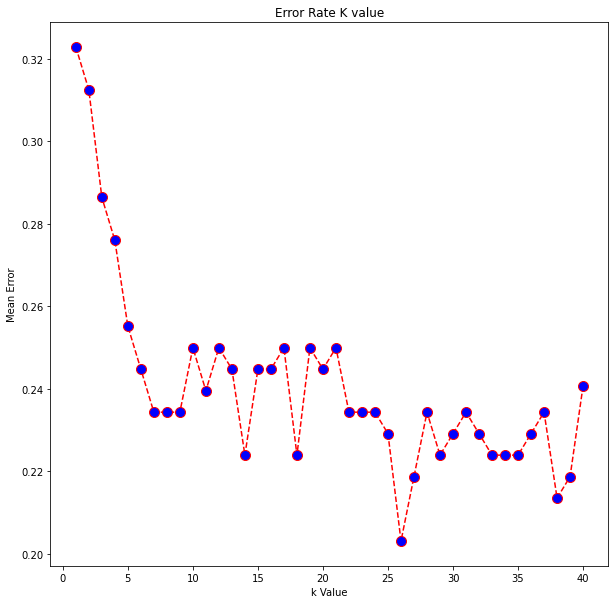

In [16]:
plt.figure(figsize=(10,10))
plt.plot(range(1,41),error,color='red',linestyle='dashed',marker='o',markerfacecolor='blue',markersize=10)
plt.title('Error Rate K value')
plt.xlabel('k Value')
plt.ylabel('Mean Error')

# Training

In [17]:
from sklearn.neighbors import KNeighborsClassifier
model= KNeighborsClassifier(n_neighbors=26,metric='minkowski',p=2)
model.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=26)

In [18]:

Count_Of_Pregnant=int(input("Enter the Number of times pregnant"))
Glucose_Concentration=int(input('Enter Plasma glucose concentration a 2 hours in an oral glucose tolerance test'))
Blood_Pressure=int(input('Enter Diastolic blood pressure (mm Hg)'))
Skin_Thickness=int(input('Enter Triceps skin fold thickness (mm)'))
BMI=int(input('Enter Body mass index (weight in kg/(height in m)^2)'))
Diabetes_Predigree_Function=int(input('Enter Diabetes pedigree function'))
Age=int(input('Enter the Age of Patient'))

NewData=[['Count_Of_Pregnant','Glucose_Concentration','Blood_Pressure','Skin_Thickness','BMI','Diabetes_Predigree_Function','Age']]

# print(result)

# if result==1:
#     print('Patient have Diabetes')
# else:
#     print('Patient not have Diabetes')